#### Name: Andrew Shapiro
#### Date: 11/25/2024
#### Exercise: Project #2, Part 2B - Analyzing the Data
#### Description: This notebook will web scrap a combined total of 100 web pages, and create 2 .csv files that we will use to analyze the 2020 and 2024 POTUS Elections.

In [54]:
import pandas as pd

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [56]:
import numpy as np

In [57]:
import seaborn as sns

## Import the cleaned data from the Web Scraping Notebook.
There are two cleaned csv files that have the data we web scraped from the `web-scraping.ipynb` notebook. 
* `Election2020.csv` has the data from the 2020 Presidential Election.
* `Election2024.csv` has the data from the 2024 Presidential Election.

In [58]:
# Read the datasets into 2 pandas data frames.
df2020 = pd.read_csv('Election2020.csv')
df2024 = pd.read_csv('Election2024.csv')

The last bit of data cleaning that I need to do for every question is make sure that the numbers are of a integer type and all of the percentages were floats. Initially, they were not so I had to go ahead and clean them below.

In [59]:
# Cleaning the 'votes' column of each dataframe to be integers, not strings.
df2020['votes'] = df2020['votes'].str.replace(',', '').astype(int)
df2024['votes'] = df2024['votes'].str.replace(',', '').astype(int)

# Cleaning the 'percentage' column of each dataframe to be floats, not strings.
df2020['percentage'] = df2020['percentage'].str.replace('%', '').astype(float)
df2024['percentage'] = df2024['percentage'].str.replace('%', '').astype(float)

Lastly, I will check to make sure there is at least 1 entry for each state + DC present. I will also be doing this before every graph to make sure that no data accidentally being left out because a missing entry, since, after all, we can't do an accurate analysis with a state or two missing.

In [60]:
# Check the number of unique states + DC.
df2020['state'].unique().shape

# Expected Output: 51

(51,)

In [61]:
# Check the number of unique states + DC.
df2024['state'].unique().shape

# Expected Output: 51

(51,)

### **(1)** How did voter turnout in 2024 compare to 2020 in each state?
* For this question, I will need to add the total amount of votes in each state for both the 2024 and 2020 elections. I will do this by looping through each row of data and adding them to a list that will hold the total number of votes.

In [62]:
# I create a new dataframe that totals up the amount of votes in the 2024 and 2020 election...
# by grouping the data by state and then adding the columns.
df2020_totals = df2020.groupby('state', as_index=False)['votes'].sum()
df2024_totals = df2024.groupby('state', as_index=False)['votes'].sum()

In [63]:
# This code below is here to let you see the data of the df2020_totals dataframe.
df2020_totals

,state,votes
0,alabama,2315724
1,alaska,356845
2,arizona,3385294
3,arkansas,1217678
4,california,17495827
5,colorado,3257053
6,connecticut,1823736
7,delaware,504010
8,district-of-columbia,330599
9,florida,11066401


In [64]:
# This code below is here to let you see the data of the df2024_totals dataframe.
df2024_totals

,state,votes
0,alabama,2248636
1,alaska,335063
2,arizona,3389319
3,arkansas,1179404
4,california,15606057
5,colorado,3179068
6,connecticut,1763712
7,delaware,511697
8,district-of-columbia,318039
9,florida,10880259


The above 2 dataframes contain all of the total votes for each state, however, we can't graph with 2 separate dataframes. For this reason, I will create a third dataframe that uses data from both dataframes using pandas' join function, which in pandas, is the merge function. I am using a full join as I am copying all of the data and just combining them.

In [65]:
# The code will merge the 2 dataframes and have each of the 'votes' have a suffix based on the dataframe. 
# The key is the 'state' column.
df_vote_dif = pd.merge(df2020_totals, df2024_totals, on='state', suffixes=('_2020', '_2024'))

df_vote_dif

,state,votes_2020,votes_2024
0,alabama,2315724,2248636
1,alaska,356845,335063
2,arizona,3385294,3389319
3,arkansas,1217678,1179404
4,california,17495827,15606057
5,colorado,3257053,3179068
6,connecticut,1823736,1763712
7,delaware,504010,511697
8,district-of-columbia,330599,318039
9,florida,11066401,10880259


After the 2 dataframes have been joined, we will now need to take both of the total vote columns and make a third one that will hold the total change in voters between the two elections. I have done this by making a third column that is the value of the 2024 election (minus) the value of the 2020 election in a 1 liner code.

In [66]:
# This will make a third column containing the total change in voters between the 2 elections.
df_vote_dif['vote_change'] = df_vote_dif['votes_2024'] - df_vote_dif['votes_2020']

df_vote_dif

,state,votes_2020,votes_2024,vote_change
0,alabama,2315724,2248636,-67088
1,alaska,356845,335063,-21782
2,arizona,3385294,3389319,4025
3,arkansas,1217678,1179404,-38274
4,california,17495827,15606057,-1889770
5,colorado,3257053,3179068,-77985
6,connecticut,1823736,1763712,-60024
7,delaware,504010,511697,7687
8,district-of-columbia,330599,318039,-12560
9,florida,11066401,10880259,-186142


After this, our data is now ready to be graphed. All of the changes below are to make the graph look more visually appealing and easier to read.

I personally find using the names from the columns good for the chart above. However, for others, renaming each one to the full name would be better. I will now rename the columns array to make them look better.

In [67]:
# Rename the columns by replacing '-' with ' ' and titling the column name
df_vote_dif['state'] = [c.replace('-', ' ').title() for c in df_vote_dif['state']]

df_vote_dif

,state,votes_2020,votes_2024,vote_change
0,Alabama,2315724,2248636,-67088
1,Alaska,356845,335063,-21782
2,Arizona,3385294,3389319,4025
3,Arkansas,1217678,1179404,-38274
4,California,17495827,15606057,-1889770
5,Colorado,3257053,3179068,-77985
6,Connecticut,1823736,1763712,-60024
7,Delaware,504010,511697,7687
8,District Of Columbia,330599,318039,-12560
9,Florida,11066401,10880259,-186142


When I first ran the code above and graphed it with the graphing code at the bottom, I wasn't appealed to it. I didn't like how it wasn't sorted and how everything was blue. I wanted to make it easier to see so I added a sort and color system to the graph.

In [68]:
df_vote_dif.sort_values('vote_change', ascending=False, inplace=True)

df_vote_dif

,state,votes_2020,votes_2024,vote_change
10,Georgia,4998707,5251799,253092
33,North Carolina,5511487,5672795,161308
38,Pennsylvania,6915283,7034275,118992
49,Wisconsin,3289421,3406308,116887
22,Michigan,5538212,5650811,112599
28,Nevada,1405376,1484840,79464
43,Texas,11309112,11371122,62010
12,Idaho,867378,900104,32726
46,Virginia,4441962,4473764,31802
40,South Carolina,2514141,2539729,25588


I was not able to find how you created the color thing in any of your slideshow materials so I used list comprehensions to make my own version. I did this by finding the value that is 50% of the data table, then, go through the entire list and check if the value is equal or greater to the top value I found earlier. If it is, it would make that color green in the color list and if it is not, it would make it gray.

This would become the `colors` list that we will use for creating our graph to make it colorful and easier for us to see.

In [69]:
# Form a color list with list comprehension and set each color depending on if it is greater than 0.
colors = ['green' if i > 0 else '#E5E5E5' for i in df_vote_dif['vote_change']]

colors

['green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5']

Before we graph, I will be doing a final check to make sure that we have all 51 rows of data.

In [102]:
# Check the number of unique states + DC.
df_vote_dif['state'].unique().shape

# Expected Output: 51

(51,)

To display the data, I used a horizontal bar chart, specifically a diverging bar chart. This is the best choice as it will go above the center axis if it has a higher voter turnout in 2024 than in 2020 and it will go below the center line it is has a lower voter turnout in 2024 than in 2020. I thought about doing a vertical bar graph, but I feel like it would look weird and the text labels may crowd in the bottom. This is why I did a horizontal bar chart.

I used the `states` column of the `df_vote_dif` dataframe. This is the column value with all of the states.
I used the `vote_change` of the `df_vote_dif` dataframe for the count data. This is the column with the number representing the voter turnout in the election. A positive number represents an increase whereas a negative number represents a decrease.

I added color from the `colors` array as well. This show display states with positive turnout in green and the others in gray.

I also added a title, x axis label, and y axis label to inform us on what the graph is about and which piece of data is each axis referencing.

Because I did not know how to make a diverging bar chart, I have had some help from **ChatGPT**. The citation is listed in the code block below.

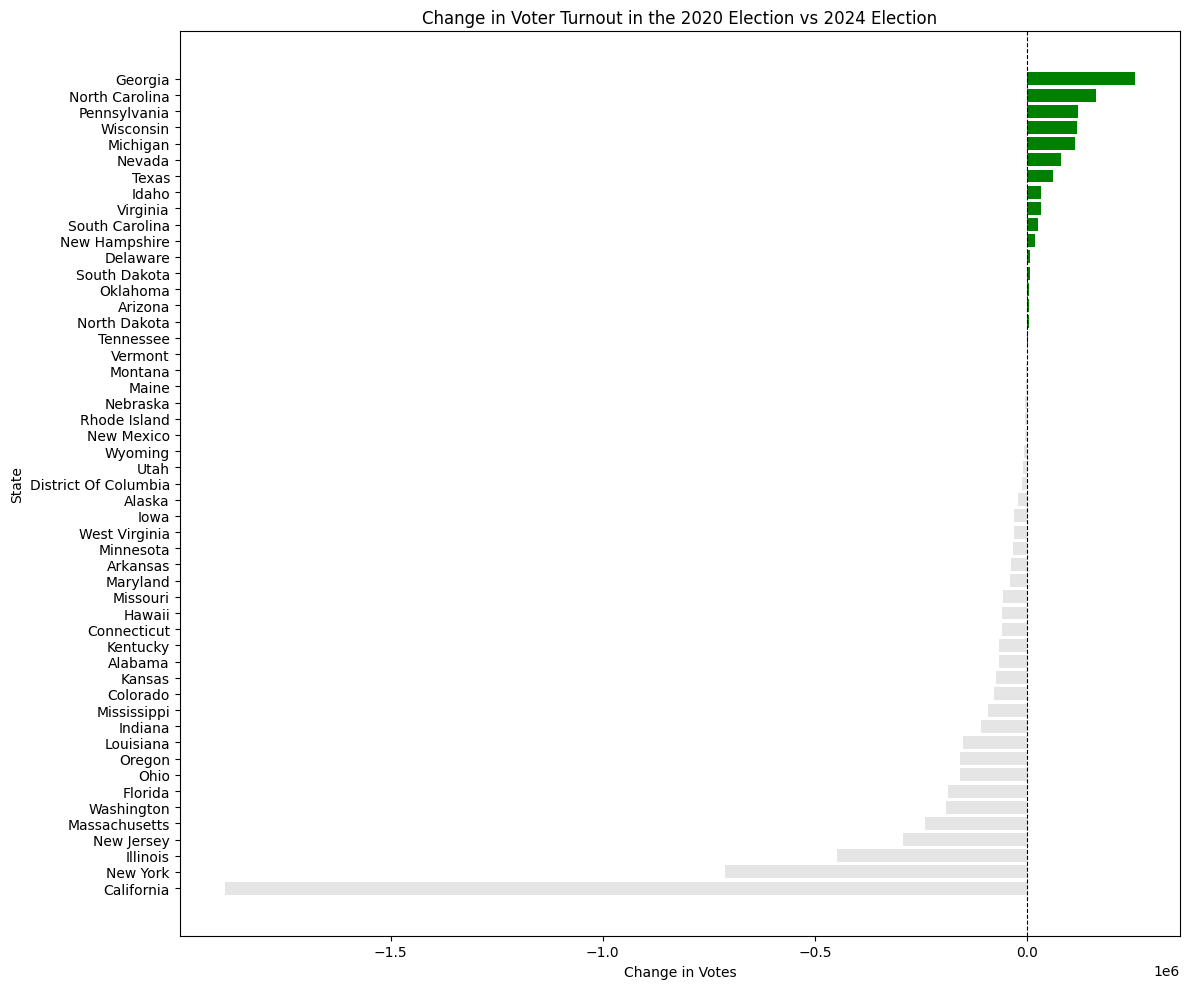

In [70]:
# Create the horizontal, diverging bar chart with the data and add the colors attribute.
plt.figure(figsize=(12, 10))
plt.barh(df_vote_dif['state'], df_vote_dif['vote_change'], color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.xlabel('Change in Votes')
plt.ylabel('State')
plt.title('Change in Voter Turnout in the 2020 Election vs 2024 Election')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Add a vertical line at +- 0 for us to see.
plt.gca().invert_yaxis()
plt.tight_layout()

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

Initially, I was shocked to see how many of the popular states did not vote as much in the 2024 election than they did in the 2020 election. Large states with many electoral votes such as California, New York, Illinois, New Jersey, and Masschusetts all had significant voter turnout changes in the most recent election. This data is very useful to showcase how many people voted in each election for states. I was also shocked to see than a larger majority of states did not vote as much in the 2024 election than they did with the 2020 election. Around 15 states have had a higher voter turnout in 2024 than they did in 2020.

However, I did notice something that I will use to factor with my next question analysis with many of the top states with the highest voter turnout.

### **(2)** How did the number of voters in battleground states compare to non-battleground states in both elections?
* For this question, I already had the data from the first question above, and I am instead changing some of the analysis on the graph. Instead of focusing on a large portion of the states, I will narrow down my analysis to only focus on the battleground states.
* I would need to hard code the states that are battleground states as a new array in the code, however, I can do something like a bar graph and show the changes where one thats above a line is more towards 1 candidate and below is towards another candidate. I can color the bars of the battleground states so its easier for us to see when we analyze it.

In [71]:
# A list to contain the values of all of the battleground states.
battleground = ["Arizona", "Georgia", "Michigan", "Nevada", "North Carolina", "Pennsylvania", "Wisconsin"]

battleground

['Arizona',
 'Georgia',
 'Michigan',
 'Nevada',
 'North Carolina',
 'Pennsylvania',
 'Wisconsin']

Looking at the output, there are 11 different options that CCM primarily relies on for people to hear about the programs that are in the data. We will be plotting those 11 data columns and showing the corresponding count of students who heard about the programs from there.

I got rid of the other columns that I didn't need for this data analysis. This is any column that didn't have the `heard` tag. This is to make it easier for me to see the entire table as the output and only focus on the columns that matter.

In [72]:
# Form a color list with list comprehension and set each color depending on if it is greater than 0.
colors = ['gold' if i in battleground else '#E5E5E5' for i in df_vote_dif['state']]

colors

['gold',
 'gold',
 'gold',
 'gold',
 'gold',
 'gold',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 'gold',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5']

Before we graph, I will be doing a final check to make sure that we have all 51 rows of data.

In [103]:
# Check the number of unique states + DC.
df_vote_dif['state'].unique().shape

# Expected Output: 51

(51,)

To display the data, I used a horizontal bar chart, specifically a diverging bar chart. This is the best choice as it will go above the center axis if it has a higher voter turnout in 2024 than in 2020 and it will go below the center line it is has a lower voter turnout in 2024 than in 2020. I thought about doing a vertical bar graph, but I feel like it would look weird and the text labels may crowd in the bottom. This is why I did a horizontal bar chart.

I used the `states` column of the `df_vote_dif` dataframe. This is the column value with all of the states.
I used the `vote_change` of the `df_vote_dif` dataframe for the count data. This is the column with the number representing the voter turnout in the election. A positive number represents an increase whereas a negative number represents a decrease.

I added color from the `colors` array as well. This show display all of our battleground states in a gold color, and everything else in grey.

I also added a title, x axis label, and y axis label to inform us on what the graph is about and which piece of data is each axis referencing.

Because I did not know how to make a diverging bar chart, I have had some help from **ChatGPT**. The citation is listed in the code block below.

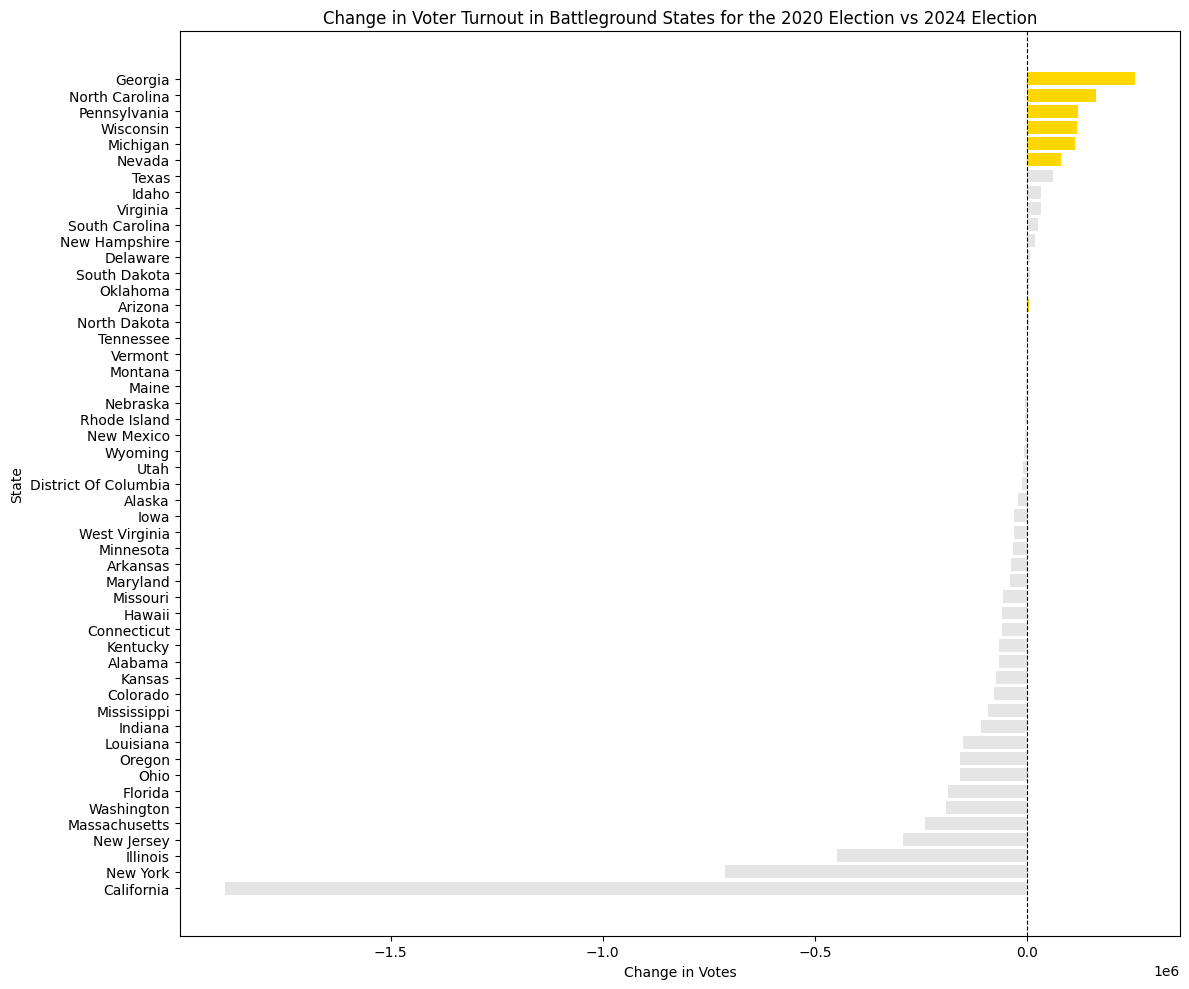

In [73]:
# Create the horizontal, diverging bar chart with the data and add the colors attribute.
plt.figure(figsize=(12, 10))
plt.barh(df_vote_dif['state'], df_vote_dif['vote_change'], color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.xlabel('Change in Votes')
plt.ylabel('State')
plt.title('Change in Voter Turnout in Battleground States for the 2020 Election vs 2024 Election')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Add a vertical line at +- 0 for us to see.
plt.gca().invert_yaxis()
plt.tight_layout()

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

From looking at this graph, which clearly identifies the battleground states in a gold/yellow color, we are able to see how most of the battleground states were states that had a large, positive voter turnout. Six of out the seven total battleground states are at the top 6 states in this list, with the exception of Minnesota, which as a slightly less voter turnout than in the 2020 election. We are able to see that voting in all of these battleground states were really tight and many went out and voted in these states.

I have decided to run the graph again, but instead of showing all of the states, I only display all of the swing states.

In [74]:
df_vote_dif_btg = df_vote_dif[df_vote_dif['state'].isin(battleground)]

df_vote_dif_btg

,state,votes_2020,votes_2024,vote_change
10,Georgia,4998707,5251799,253092
33,North Carolina,5511487,5672795,161308
38,Pennsylvania,6915283,7034275,118992
49,Wisconsin,3289421,3406308,116887
22,Michigan,5538212,5650811,112599
28,Nevada,1405376,1484840,79464
2,Arizona,3385294,3389319,4025


I was not able to find how you created the color thing in any of your slideshow materials so I used list comprehensions to make my own version. I did this by finding the value that is 50% of the data table, then, go through the entire list and check if the value is equal or greater to the top value I found earlier. If it is, it would make that color green in the color list and if it is not, it would make it gray.

This would become the `colors` list that we will use for creating our graph to make it colorful and easier for us to see.

In [75]:
# Form a color list with list comprehension and set each color depending on if it is greater than 0.
colors = ['green' if i > 0 else '#E5E5E5' for i in df_vote_dif_btg['vote_change']]

colors

['green', 'green', 'green', 'green', 'green', 'green', 'green']

Before we graph, I will be doing a final check to make sure that we have all 7 rows of data.

In [105]:
# Check the number of unique states + DC.
df_vote_dif_btg['state'].unique().shape

# Expected Output: 7

(7,)

To display the data, I used a horizontal bar chart, specifically a diverging bar chart. This is the best choice as it will go above the center axis if it has a higher voter turnout in 2024 than in 2020 and it will go below the center line it is has a lower voter turnout in 2024 than in 2020. I thought about doing a vertical bar graph, but I feel like it would look weird and the text labels may crowd in the bottom. This is why I did a horizontal bar chart.

I used the `states` column of the `df_vote_dif_btg` dataframe. This is the column value with all of the states.
I used the `vote_change` of the `df_vote_dif_btg` dataframe for the count data. This is the column with the number representing the voter turnout in the election. A positive number represents an increase whereas a negative number represents a decrease.

I added color from the `colors` array as well. This show display all of our battleground states in a gold color, and everything else in grey.

I also added a title, x axis label, and y axis label to inform us on what the graph is about and which piece of data is each axis referencing.

Because I did not know how to make a diverging bar chart, I have had some help from **ChatGPT**. The citation is listed in the code block below.

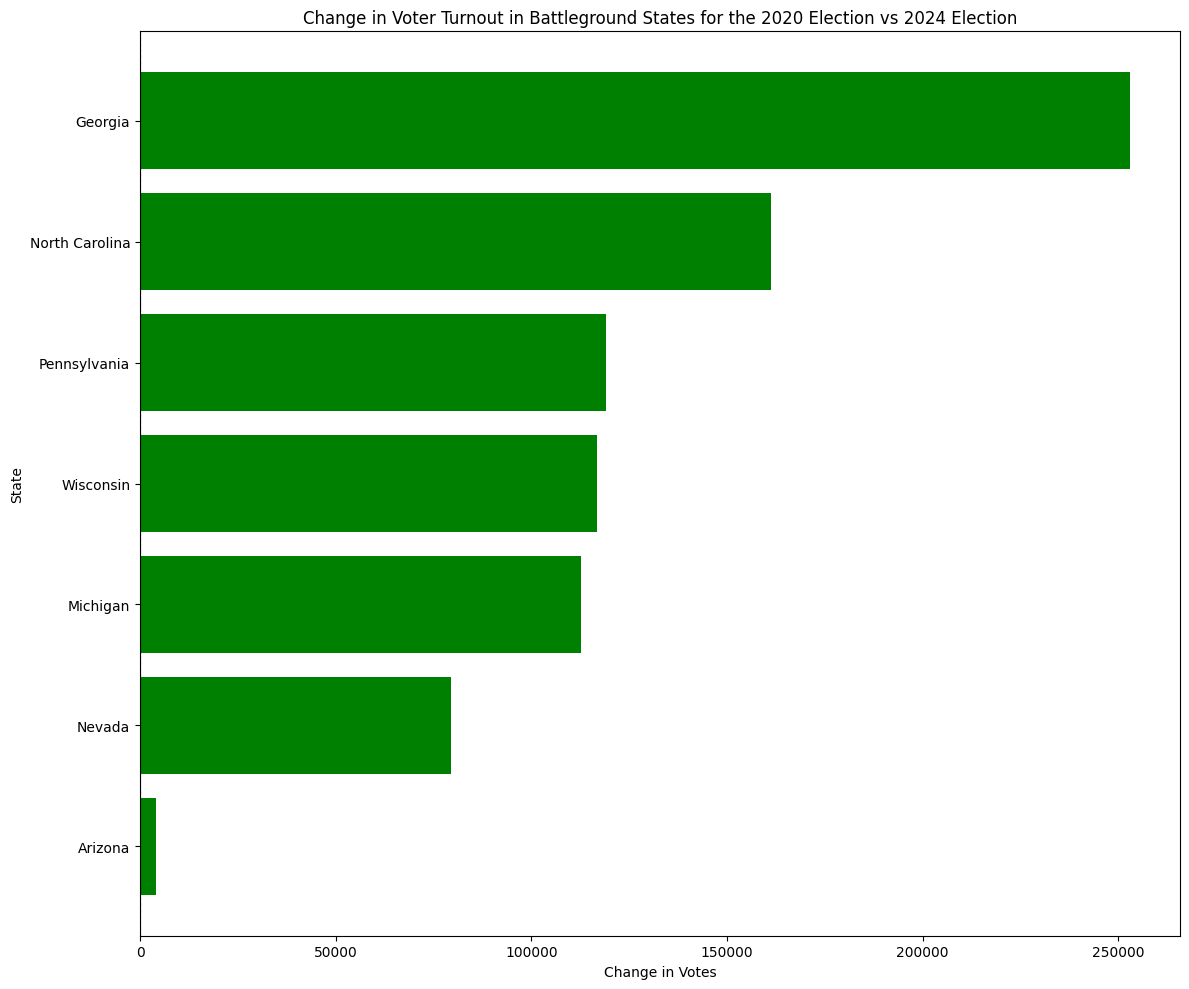

In [76]:
# Create the horizontal, diverging bar chart with the data and add the colors attribute.
plt.figure(figsize=(12, 10))
plt.barh(df_vote_dif_btg['state'], df_vote_dif_btg['vote_change'], color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.xlabel('Change in Votes')
plt.ylabel('State')
plt.title('Change in Voter Turnout in Battleground States for the 2020 Election vs 2024 Election')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Add a vertical line at +- 0 for us to see.
plt.gca().invert_yaxis()
plt.tight_layout()

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

In this chart, we can clearly see how all 7 of the states saw an increase in votes in the 2024 election than the 2020 election. Of the 7 states, the maximum, in Georgia, was 250,000 additional votes cast. Additionally, Arizona had a similar amount at to the 2020 election (it didn't surplas it as much.)

While this data does show a large number, keep in mind that the numbers are expected to keep growing as votes are only 99.6% counted. While 0.4% isn't a lot, it does have the ability to show a large increase once all of the votes are checked.


### **(3)** Which states saw the largest shift in vote percentage between the 2020 and 2024 election?
* For this question, I will reference only the top 2 parties, which are the Republican Party (GOP) and the Democratic Party (DEM). This is because the third parties do not really have a significant effect on the electoral college as they all have a low total vote percentage.
* I have gone ahead and filtered both of the dataframes to only include 2 rows for each state: the republican candidate row and the democratic candidate row.

In [77]:
# I will get rid of any spaces that may be messing with any potential results.
df2020['party'] = df2020['party'].str.replace(' ', '', regex=False)
df2024['party'] = df2024['party'].str.replace(' ', '', regex=False)

# I will filter out only by the top 2 parties (Republican, Democratic).
df2020_shift = df2020[df2020['party'].isin(['Republican', 'Democratic'])]

# I will filter out only by the top 2 parties (Republican, Democratic).
df2024_shift = df2024[df2024['party'].isin(['GOP', 'DEM'])]
# The 2024 dataframe will only say "GOP" and "DEM", so for consistency, I have renamed all instances of GOP and DEM
df2024_shift.loc[:, 'party'] = df2024_shift['party'].replace({'GOP': 'Republican', 'DEM': 'Democratic'})

In [78]:
# This code below is here to let you see the data of the df2020_shift dataframe.
df2020_shift

,state,name,party,votes,percentage
0,alabama,Donald J. Trump,Republican,1441170,62.2
1,alabama,Joe Biden,Democratic,849378,36.7
3,alaska,Donald J. Trump,Republican,189543,53.1
4,alaska,Joe Biden,Democratic,153502,43.0
10,arizona,Joe Biden,Democratic,1672143,49.4
...,...,...,...,...,...
298,west-virginia,Joe Biden,Democratic,235847,29.7
301,wisconsin,Joe Biden,Democratic,1630503,49.6
302,wisconsin,Donald J. Trump,Republican,1610036,48.9
306,wyoming,Donald J. Trump,Republican,193559,70.4


In [79]:
# This code below is here to let you see the data of the df2024_shift dataframe.
df2024_shift

,state,name,party,votes,percentage
0,alabama,Donald J. Trump,Republican,1457913,64.8
1,alabama,Kamala Harris,Democratic,769482,34.2
5,alaska,Donald J. Trump,Republican,184204,54.5
6,alaska,Kamala Harris,Democratic,139812,41.4
10,arizona,Donald J. Trump,Republican,1770242,52.2
...,...,...,...,...,...
224,west-virginia,Kamala Harris,Democratic,214309,28.1
228,wisconsin,Donald J. Trump,Republican,1697784,49.7
229,wisconsin,Kamala Harris,Democratic,1668077,48.8
233,wyoming,Donald J. Trump,Republican,192633,72.1


Because this question only takes into account the political party and percentage, to make the data easier to see, I have decided that it is best to drop the `names` and `votes` columns of each dataset so it doesn't clog up the entire table.

In [80]:
# Drop the 'names' and 'votes' columns of the two datasets.
df2020_shift = df2020_shift.drop({'name', 'votes'}, axis=1)
df2024_shift = df2024_shift.drop({'name', 'votes'}, axis=1)


In [81]:
# This code below is here to let you see the data of the df2020_shift dataframe.
df2020_shift

,state,party,percentage
0,alabama,Republican,62.2
1,alabama,Democratic,36.7
3,alaska,Republican,53.1
4,alaska,Democratic,43.0
10,arizona,Democratic,49.4
...,...,...,...
298,west-virginia,Democratic,29.7
301,wisconsin,Democratic,49.6
302,wisconsin,Republican,48.9
306,wyoming,Republican,70.4


In [82]:
# This code below is here to let you see the data of the df2024_shift dataframe.
df2024_shift

,state,party,percentage
0,alabama,Republican,64.8
1,alabama,Democratic,34.2
5,alaska,Republican,54.5
6,alaska,Democratic,41.4
10,arizona,Republican,52.2
...,...,...,...
224,west-virginia,Democratic,28.1
228,wisconsin,Republican,49.7
229,wisconsin,Democratic,48.8
233,wyoming,Republican,72.1


Now, I have decided to combine all of the Republican/GOP data into 1 dataset and all of the Democratic/DEM data into another dataset (don't worry, they'll be combined at the very end). This is to allow us to be able to calculate the net change of both parties which we will combine together and final 1 total net change.

In [83]:
# Filter for all of those rows that have a Republican data table.
df2020_shift_GOP = df2020_shift[df2020_shift['party'] == 'Republican']
df2024_shift_GOP = df2024_shift[df2024_shift['party'] == 'Republican']

# Merge the data tables, using the state as the key.
df_shift_GOP = pd.merge(df2020_shift_GOP, df2024_shift_GOP, on='state', suffixes=('_2020', '_2024'))
# Drop the parties now that they are no longer necessary.
df_shift_GOP = df_shift_GOP.drop(['party_2020', 'party_2024'], axis=1)

df_shift_GOP

,state,percentage_2020,percentage_2024
0,alabama,62.2,64.8
1,alaska,53.1,54.5
2,arizona,49.1,52.2
3,arkansas,62.4,64.2
4,california,34.3,38.2
5,colorado,41.9,43.2
6,connecticut,39.2,41.9
7,delaware,39.8,41.9
8,district-of-columbia,5.5,6.6
9,florida,51.2,56.1


EE

This is the same code above but with the Democratic/DEM party.

In [84]:
# Filter for all of those rows that have a Democratic data table.
df2020_shift_DEM = df2020_shift[df2020_shift['party'] == 'Democratic']
df2024_shift_DEM = df2024_shift[df2024_shift['party'] == 'Democratic']

# Merge the data tables, using the state as the key.
df_shift_DEM = pd.merge(df2020_shift_DEM, df2024_shift_DEM, on='state', suffixes=('_2020', '_2024'))
# Drop the parties now that they are no longer necessary.
df_shift_DEM = df_shift_DEM.drop(['party_2020', 'party_2024'], axis=1)

df_shift_DEM

,state,percentage_2020,percentage_2024
0,alabama,36.7,34.2
1,alaska,43.0,41.4
2,arizona,49.4,46.7
3,arkansas,34.8,33.6
4,california,63.5,58.6
5,colorado,55.4,54.2
6,connecticut,59.3,56.4
7,delaware,58.8,56.6
8,district-of-columbia,92.9,92.5
9,florida,47.9,43.0


Now, I will calculate the shift in percentages from the 2020 election to the 2024 election. A positive change means that they performed better in the 2024 election than the 2020.

In [85]:
# This will make a third column containing the total change in voters between the 2 elections.
df_shift_GOP['shift'] = df_shift_GOP['percentage_2024'] - df_shift_GOP['percentage_2020']

df_shift_GOP

,state,percentage_2020,percentage_2024,shift
0,alabama,62.2,64.8,2.6
1,alaska,53.1,54.5,1.4
2,arizona,49.1,52.2,3.1
3,arkansas,62.4,64.2,1.8
4,california,34.3,38.2,3.9
5,colorado,41.9,43.2,1.3
6,connecticut,39.2,41.9,2.7
7,delaware,39.8,41.9,2.1
8,district-of-columbia,5.5,6.6,1.1
9,florida,51.2,56.1,4.9


The code above was for the Republican/GOP Party, so now it's time to do the same for the Democratic/DEM party.

In [86]:
# This will make a third column containing the total change in voters between the 2 elections.
df_shift_DEM['shift'] = df_shift_DEM['percentage_2024'] - df_shift_DEM['percentage_2020']

df_shift_DEM

,state,percentage_2020,percentage_2024,shift
0,alabama,36.7,34.2,-2.5
1,alaska,43.0,41.4,-1.6
2,arizona,49.4,46.7,-2.7
3,arkansas,34.8,33.6,-1.2
4,california,63.5,58.6,-4.9
5,colorado,55.4,54.2,-1.2
6,connecticut,59.3,56.4,-2.9
7,delaware,58.8,56.6,-2.2
8,district-of-columbia,92.9,92.5,-0.4
9,florida,47.9,43.0,-4.9


Almost done! I will now merge the two datasets together so we can calculate a final net change.

In [87]:
# Merge the 2 datasets together using the 'state' as the key.
df_shifts = pd.merge(df_shift_DEM, df_shift_GOP, on='state', suffixes=('_DEM', '_GOP'))

df_shifts

,state,percentage_2020_DEM,percentage_2024_DEM,shift_DEM,percentage_2020_GOP,percentage_2024_GOP,shift_GOP
0,alabama,36.7,34.2,-2.5,62.2,64.8,2.6
1,alaska,43.0,41.4,-1.6,53.1,54.5,1.4
2,arizona,49.4,46.7,-2.7,49.1,52.2,3.1
3,arkansas,34.8,33.6,-1.2,62.4,64.2,1.8
4,california,63.5,58.6,-4.9,34.3,38.2,3.9
5,colorado,55.4,54.2,-1.2,41.9,43.2,1.3
6,connecticut,59.3,56.4,-2.9,39.2,41.9,2.7
7,delaware,58.8,56.6,-2.2,39.8,41.9,2.1
8,district-of-columbia,92.9,92.5,-0.4,5.5,6.6,1.1
9,florida,47.9,43.0,-4.9,51.2,56.1,4.9


I will now calculate the net shift by subtracting the GOP shift with the DEM shift. This will be the column that I will be plotting as the data. In this case, a positive value means that a state has voted more Republican in the 2024 election than the 2020 election. If we did `DEM (-) REP`, a positive value would indicate a state has voted more Democrat in the 2024 election than 2020.

In [88]:
# Create a new column with the net shift.
df_shifts['net'] = df_shifts['shift_GOP'] - df_shifts['shift_DEM']

df_shifts

,state,percentage_2020_DEM,percentage_2024_DEM,shift_DEM,percentage_2020_GOP,percentage_2024_GOP,shift_GOP,net
0,alabama,36.7,34.2,-2.5,62.2,64.8,2.6,5.1
1,alaska,43.0,41.4,-1.6,53.1,54.5,1.4,3.0
2,arizona,49.4,46.7,-2.7,49.1,52.2,3.1,5.8
3,arkansas,34.8,33.6,-1.2,62.4,64.2,1.8,3.0
4,california,63.5,58.6,-4.9,34.3,38.2,3.9,8.8
5,colorado,55.4,54.2,-1.2,41.9,43.2,1.3,2.5
6,connecticut,59.3,56.4,-2.9,39.2,41.9,2.7,5.6
7,delaware,58.8,56.6,-2.2,39.8,41.9,2.1,4.3
8,district-of-columbia,92.9,92.5,-0.4,5.5,6.6,1.1,1.5
9,florida,47.9,43.0,-4.9,51.2,56.1,4.9,9.8


When I first ran the code above and graphed it with the graphing code at the bottom, I wasn't appealed to it. I didn't like how it wasn't sorted and how everything was blue. I wanted to make it easier to see so I added a sort and color system to the graph.

In [89]:
df_shifts.sort_values('net', ascending=False, inplace=True)

df_shifts

,state,percentage_2020_DEM,percentage_2024_DEM,shift_DEM,percentage_2020_GOP,percentage_2024_GOP,shift_GOP,net
32,new-york,60.9,55.9,-5.0,37.7,44.1,6.4,11.4
30,new-jersey,57.3,52.0,-5.3,41.4,46.1,4.7,10.0
9,florida,47.9,43.0,-4.9,51.2,56.1,4.9,9.8
4,california,63.5,58.6,-4.9,34.3,38.2,3.9,8.8
21,massachusetts,65.9,61.4,-4.5,32.2,36.5,4.3,8.8
43,texas,46.5,42.5,-4.0,52.1,56.2,4.1,8.1
39,rhode-island,59.6,55.8,-3.8,38.9,42.0,3.1,6.9
24,mississippi,41.1,37.9,-3.2,57.6,60.9,3.3,6.5
42,tennessee,37.5,34.5,-3.0,60.7,64.1,3.4,6.4
11,hawaii,63.7,60.6,-3.1,34.3,37.5,3.2,6.3


I wanted to create a color gradient, as I feel like it would look best for this kind of graph and question. I wasn't able to figure out how to do it on my own, so I have asked **ChatGPT** for help on this (citation below).

In [90]:
def color(arr):

    min_value = arr['net'].min()
    max_value = arr['net'].max()

    def calculate_color(value):
        if value <= 0:
            # Interpolate from blue (min_value) to gray (0)
            blue_intensity = (value - min_value) / abs(min_value)
            return mcolors.to_hex((blue_intensity, blue_intensity, 1))  
        else:
            # Interpolate from gray (0) to red (max_value)
            red_intensity = value / max_value
            return mcolors.to_hex((1, 1 - red_intensity, 1 - red_intensity))  

    return arr['net'].apply(calculate_color).tolist()

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

In [91]:
# Form a color list with list comprehension and set each color depending on if it is greater than 0.
colors = color(df_shifts)

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

colors

['#ff0000',
 '#ff1f1f',
 '#ff2424',
 '#ff3a3a',
 '#ff3a3a',
 '#ff4a4a',
 '#ff6565',
 '#ff6e6e',
 '#ff7070',
 '#ff7272',
 '#ff7777',
 '#ff7b7b',
 '#ff7d7d',
 '#ff7f7f',
 '#ff8282',
 '#ff8484',
 '#ff8d8d',
 '#ff8d8d',
 '#ff8d8d',
 '#ff9696',
 '#ff9696',
 '#ff9696',
 '#ff9f9f',
 '#ff9f9f',
 '#ffa1a1',
 '#ffaaaa',
 '#ffacac',
 '#ffb3b3',
 '#ffb7b7',
 '#ffb7b7',
 '#ffb7b7',
 '#ffbcbc',
 '#ffbcbc',
 '#ffbcbc',
 '#ffbcbc',
 '#ffbcbc',
 '#ffbebe',
 '#ffbebe',
 '#ffc7c7',
 '#ffc9c9',
 '#ffcccc',
 '#ffd2d2',
 '#ffd5d5',
 '#ffd7d7',
 '#ffdbdb',
 '#ffdbdb',
 '#ffdddd',
 '#ffe0e0',
 '#ffe4e4',
 '#ffe6e6',
 '#ffefef']

After this, our data is now ready to be graphed. All of the changes below are to make the graph look more visually appealing and easier to read.

I personally find using the names from the columns good for the chart above. However, for others, renaming each one to the full name would be better. I will now rename the columns array to make them look better.

In [92]:
# Rename the columns by replacing '-' with ' ' and titling the column name
df_shifts['state'] = [c.replace('-', ' ').title() for c in df_shifts['state']]

df_shifts

,state,percentage_2020_DEM,percentage_2024_DEM,shift_DEM,percentage_2020_GOP,percentage_2024_GOP,shift_GOP,net
32,New York,60.9,55.9,-5.0,37.7,44.1,6.4,11.4
30,New Jersey,57.3,52.0,-5.3,41.4,46.1,4.7,10.0
9,Florida,47.9,43.0,-4.9,51.2,56.1,4.9,9.8
4,California,63.5,58.6,-4.9,34.3,38.2,3.9,8.8
21,Massachusetts,65.9,61.4,-4.5,32.2,36.5,4.3,8.8
43,Texas,46.5,42.5,-4.0,52.1,56.2,4.1,8.1
39,Rhode Island,59.6,55.8,-3.8,38.9,42.0,3.1,6.9
24,Mississippi,41.1,37.9,-3.2,57.6,60.9,3.3,6.5
42,Tennessee,37.5,34.5,-3.0,60.7,64.1,3.4,6.4
11,Hawaii,63.7,60.6,-3.1,34.3,37.5,3.2,6.3


Before we graph, I will be doing a final check to make sure that we have all 51 rows of data.

In [106]:
# Check the number of unique states + DC.
df_shifts['state'].unique().shape

# Expected Output: 51

(51,)

To display the data, I used a horizontal bar chart, specifically a diverging bar chart. This is the best choice as it will go above the center axis if it has a higher voter turnout in 2024 than in 2020 and it will go below the center line it is has a lower voter turnout in 2024 than in 2020. I thought about doing a vertical bar graph, but I feel like it would look weird and the text labels may crowd in the bottom. This is why I did a horizontal bar chart.

I used the `states` column of the `df_shifts` dataframe. This is the column value with all of the states.
I used the `vote_change` of the `df_shifts` dataframe for the count data. This is the column with the number representing shift for each state.

I added color from the `colors` array as well. This show display states based on the color scheming we declared earlier.

I also added a title, x axis label, and y axis label to inform us on what the graph is about and which piece of data is each axis referencing.

Because I did not know how to make a diverging bar chart, I have had some help from **ChatGPT**. The citation is listed in the code block below.

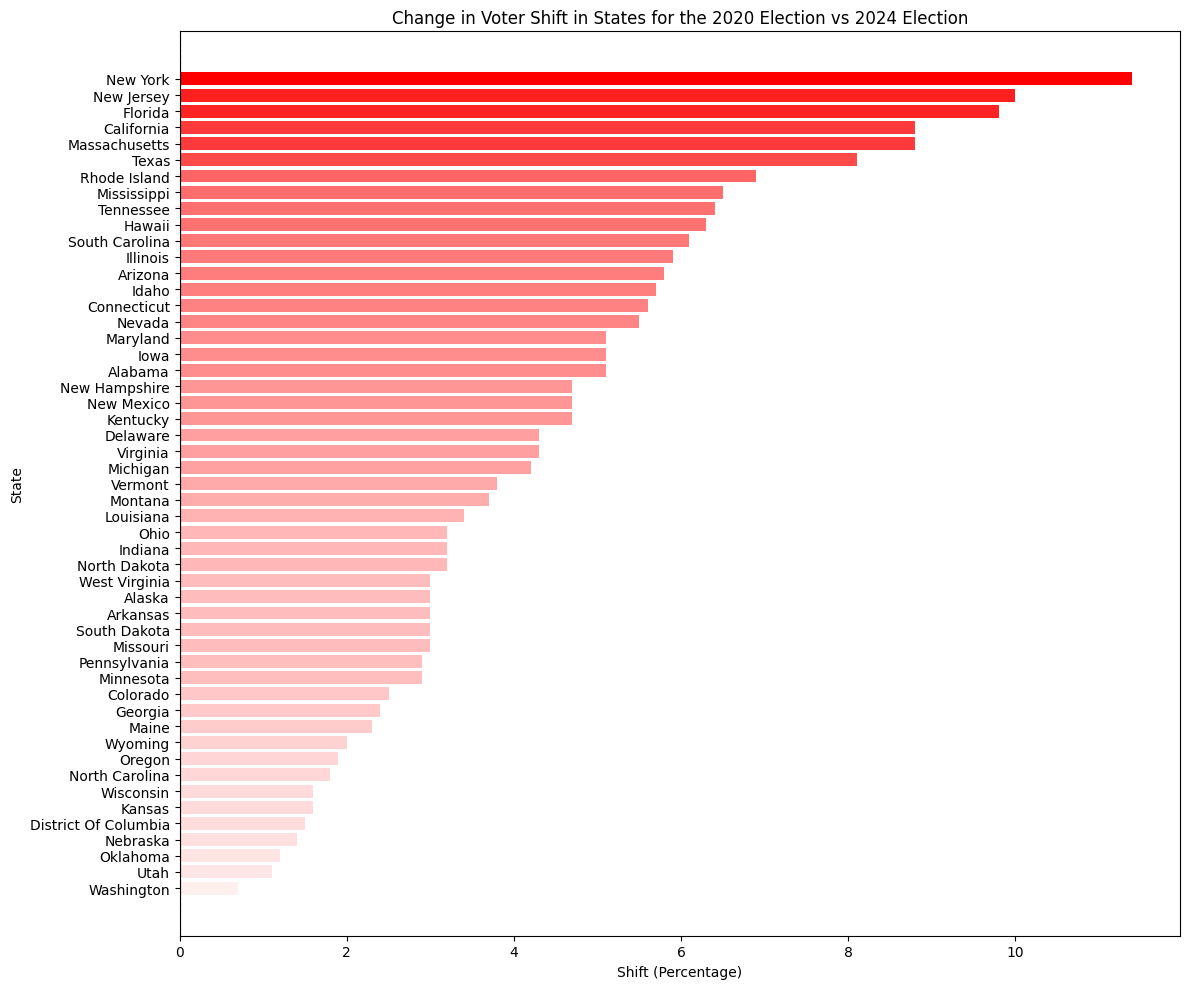

In [93]:
# Create the horizontal, diverging bar chart with the data and add the colors attribute.
plt.figure(figsize=(12, 10))
plt.barh(df_shifts['state'], df_shifts['net'], color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.xlabel('Shift (Percentage)')
plt.ylabel('State')
plt.title('Change in Voter Shift in States for the 2020 Election vs 2024 Election')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Add a vertical line at +- 0 for us to see.
plt.gca().invert_yaxis()
plt.tight_layout()

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

This data was shocking, because I never intended for all states to a shift Republican. Usually, it's a mix of both, but in this election, all of the shifts shifted to the Republican side. For "hard blue" states like New York and California, this meant that the margin that Kamala was leading was slimmer than the margin that Joe Biden was winning against Donald J. Trump in 2020. This was something new to me, as it definitely showed the large impact nationally Trump had between the 2 elections.

### **(4)** Which third-party 2024 presidential candidate was on the most state ballots?
* For this question, I needed to reference the column data of just the 2024 dataset.

In [94]:
# Get the list of unique values in the candidate name column.
candidates = df2024['name'].unique()

candidates

array(['Donald J. Trump', 'Kamala Harris', 'Robert F. Kennedy Jr.',
       'Chase Oliver', 'Jill Stein', 'Claudia De la Cruz',
       'Vermin Supreme', 'Cornel West', 'Shiva Ayyadurai',
       'None Of These Candidates', 'Joel Skousen', 'Richard Duncan',
       'Peter Sonski', 'Chris Garrity'], dtype=object)

For this question, I specifically asked for third party candidates, which means that Donald Trump and Kamala Harris would have to excluded in thie data analysis. For this reason, I have used a for loop that basically goes through each value, removes it, and adds it back into the array if it's not Donald Trump or Kamala Harris.

In [95]:
# Removing the 2 candidates using a for loop.
candidates = [candidate for candidate in candidates if candidate not in ["Donald J. Trump", "Kamala Harris"]]

candidates

['Robert F. Kennedy Jr.',
 'Chase Oliver',
 'Jill Stein',
 'Claudia De la Cruz',
 'Vermin Supreme',
 'Cornel West',
 'Shiva Ayyadurai',
 'None Of These Candidates',
 'Joel Skousen',
 'Richard Duncan',
 'Peter Sonski',
 'Chris Garrity']

After looking at the data, I noticed that there was 1 candidate called "None Of These Candidates", which doesn't make sense to include in our analysis, so I have decided to remove that value as well from our list.

In [96]:
# Removing the "None of These Candidates" value.
candidates = [candidate for candidate in candidates if candidate not in["None Of These Candidates",]]

candidates

['Robert F. Kennedy Jr.',
 'Chase Oliver',
 'Jill Stein',
 'Claudia De la Cruz',
 'Vermin Supreme',
 'Cornel West',
 'Shiva Ayyadurai',
 'Joel Skousen',
 'Richard Duncan',
 'Peter Sonski',
 'Chris Garrity']

Now that we have a list of third party candidates, we will now need to count how many states' ballots they are on. In this case, there are many approaches to doing this. In my case, I went ahead and used the .groupby() function to group them by the candidate name and count the states.

In [97]:
count = df2024.groupby('name')['state'].count()

count

name
Chase Oliver                46
Chris Garrity                1
Claudia De la Cruz           6
Cornel West                  6
Donald J. Trump             51
Jill Stein                  37
Joel Skousen                 2
Kamala Harris               51
None Of These Candidates     1
Peter Sonski                 1
Richard Duncan               1
Robert F. Kennedy Jr.       32
Shiva Ayyadurai              1
Vermin Supreme               1
Name: state, dtype: int64

Lastly, I will make a new dataframe using both the count (for the numerical data) and the candidates data (for the candidate names) to be able to create a dataframe that we can use to graph the values.

In [98]:
df2024_3p = pd.DataFrame({
    'name': candidates,
    'count': [count.get(candidate, 0) for candidate in candidates]
})

df2024_3p

,name,count
0,Robert F. Kennedy Jr.,32
1,Chase Oliver,46
2,Jill Stein,37
3,Claudia De la Cruz,6
4,Vermin Supreme,1
5,Cornel West,6
6,Shiva Ayyadurai,1
7,Joel Skousen,2
8,Richard Duncan,1
9,Peter Sonski,1


When I first ran the code above and graphed it with the graphing code at the bottom, I wasn't appealed to it. I didn't like how it wasn't sorted and how everything was blue. I wanted to make it easier to see so I added a sort and color system to the graph.

In [99]:
df2024_3p.sort_values('count', ascending=True, inplace=True)

df2024_3p

,name,count
6,Shiva Ayyadurai,1
4,Vermin Supreme,1
9,Peter Sonski,1
8,Richard Duncan,1
10,Chris Garrity,1
7,Joel Skousen,2
5,Cornel West,6
3,Claudia De la Cruz,6
0,Robert F. Kennedy Jr.,32
2,Jill Stein,37


In [100]:
maximum = max(df2024_3p['count'])
# Form a color list with list comprehension and set each color depending on if it is the max value.
colors = ['green' if i == maximum else '#E5E5E5' for i in df2024_3p['count']]

colors

['#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 'green']

To display the data, I used a horizontal bar chart. This is the best choice as it will display each computing area on the y axis and show the count on the x axis. I thought about doing a vertical bar graph, but I feel like it would look weird and the text labels may crowd in the bottom. This is why I did a horizontal bar chart.

I used the `name` column of the df2024_3p for the column data. This is the column that has all of the candidate names, all sorted using the algorithm earlier. I used the the `count` column for the count data. This is the list of counts of how many states + DC the 3rd party candidates and sorted using the algorithm earlier.

I added color from the colors array as well. This show display the top option in green and the others in gray.

I also added a title, x axis label, and y axis label to inform us on what the graph is about and which piece of data is each axis referencing.

Text(0, 0.5, 'Candidate')

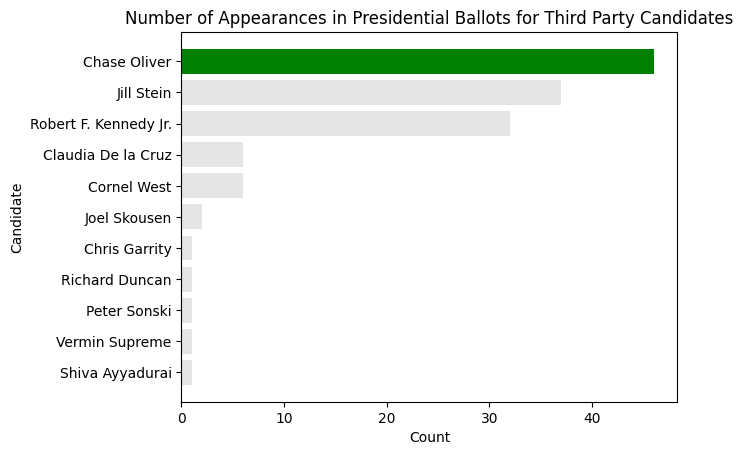

In [101]:
# Create the horizontal bar chart with the data and add the colors attribute.
plt.barh(df2024_3p['name'],df2024_3p['count'], color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.title("Number of Appearances in Presidential Ballots for Third Party Candidates")
plt.xlabel("Count")
plt.ylabel("Candidate")

From this analysis, we see that no third party candidate has been on all 51 presidential ballots and that third party candidates Chase Oliver (LIB), Jill Stein (GRE), and RFK Jr. (IND) have appeared in the most ballots out of the third party candidates. Even with this, Chase Oliver, who had the most presidential ballot appearances as a third party candidate, was only present in around 80% of the ballots, while Jill Stein had around 70%, and RFK Jr. with 55%. Additionally, there were several candidates that were present in 1 ballot, a lot more than I originally thought of before.